In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout

%matplotlib inline

In [ ]:
#Download the CSV from the Drive
!gdown --id 1x1J9x-bGOxnDrdoU5ywHmMIGpQGRm6GH

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1x1J9x-bGOxnDrdoU5ywHmMIGpQGRm6GH
To: /content/TRAININGDATAA.csv
100% 3.30k/3.30k [00:00<00:00, 4.42MB/s]


In [ ]:
#Load the data from the CSV
df=pd.read_csv("/content/TRAININGDATAA.csv",encoding= 'unicode_escape', index_col='Column1')
df

,d [mm],V [m/min],f [mm/rev],L [mm],Ra [µ/m],Nw [µ/min],Ra [µ/m]_1,Nw [µ/min]_2
Column1,,,,,,,,
1,1.0,30,0.052,40,1.82,0.110,1.32,0.047
2,1.0,30,0.052,80,1.94,0.127,1.54,0.079
3,1.0,30,0.052,120,2.12,0.160,1.68,0.083
4,1.0,30,0.104,40,2.15,0.135,2.00,0.070
5,1.0,30,0.104,80,2.18,0.139,2.40,0.092
...,...,...,...,...,...,...,...,...
77,2.0,90,0.104,80,2.70,0.425,3.24,0.560
78,2.0,90,0.104,120,3.20,0.650,3.45,0.680
79,2.0,90,0.162,40,4.98,0.555,5.34,0.412


In [ ]:
# Define X and Y
x = df[['d [mm]', 'V [m/min]', 'f [mm/rev]', 'L [mm]']]
y1 = df[['Ra [µ/m]', 'Nw [µ/min]']]
y2 = df[['Ra [µ/m]_1', 'Nw [µ/min]_2']]
y1

,Ra [µ/m],Nw [µ/min]
Column1,,
1,1.82,0.110
2,1.94,0.127
3,2.12,0.160
4,2.15,0.135
5,2.18,0.139
...,...,...
77,2.70,0.425
78,3.20,0.650
79,4.98,0.555


In [ ]:
# Scale between 0-1 
# 3 scalars for 3 data origins

scaler_x = MinMaxScaler()
scaler_y1 = MinMaxScaler()
scaler_y2 = MinMaxScaler()

x_scale  = scaler_x.fit_transform(x)
y1_scale = scaler_y1.fit_transform(y1)
y2_scale = scaler_y2.fit_transform(y2)

x_scale.shape, y1_scale.shape, y2_scale.shape

((81, 4), (81, 2), (81, 2))

In [ ]:
# Train test splitting
x_train, x_test, y_train, y_test = train_test_split(x_scale, y1_scale, test_size=0.2, random_state=45)

# Same for the Second Tool
x_train, x_test, y_train, y_test = train_test_split(x_scale, y1_scale, test_size=0.2, random_state=45)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((64, 4), (17, 4), (64, 2), (17, 2))

In [ ]:
def get_model_architecture():
    model = Sequential()
    
    #Layer 1
    model.add(Dense(25, input_dim=4))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #Layer 2
    model.add(Dense(100))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #Layer 3
    model.add(Dense(25, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #Output Layer
    model.add(Dense(2, activation='linear'))

    return model

In [ ]:
model_for_y1 = get_model_architecture()
model_for_y1.compile(loss='mse', optimizer='adam', metrics=['mae'])
model_for_y1.summary()

model_for_y2 = get_model_architecture()
model_for_y2.compile(loss='mse', optimizer='adam', metrics=['mae'])
model_for_y2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                125       
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               2600      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

In [ ]:
history = model_for_y1.fit(x_train, y_train, epochs=800, verbose=2, validation_split=0.2)

Epoch 1/800
2/2 - 2s - loss: 0.9376 - mae: 0.7312 - val_loss: 0.1217 - val_mae: 0.2695 - 2s/epoch - 759ms/step
Epoch 2/800
2/2 - 0s - loss: 0.8067 - mae: 0.7134 - val_loss: 0.1198 - val_mae: 0.2680 - 24ms/epoch - 12ms/step
Epoch 3/800
2/2 - 0s - loss: 0.9253 - mae: 0.7180 - val_loss: 0.1175 - val_mae: 0.2656 - 25ms/epoch - 12ms/step
Epoch 4/800
2/2 - 0s - loss: 0.4703 - mae: 0.5465 - val_loss: 0.1157 - val_mae: 0.2633 - 24ms/epoch - 12ms/step
Epoch 5/800
2/2 - 0s - loss: 0.5380 - mae: 0.5679 - val_loss: 0.1143 - val_mae: 0.2614 - 25ms/epoch - 12ms/step
Epoch 6/800
2/2 - 0s - loss: 0.4209 - mae: 0.4928 - val_loss: 0.1123 - val_mae: 0.2593 - 24ms/epoch - 12ms/step
Epoch 7/800
2/2 - 0s - loss: 0.5404 - mae: 0.5783 - val_loss: 0.1103 - val_mae: 0.2572 - 26ms/epoch - 13ms/step
Epoch 8/800
2/2 - 0s - loss: 0.4767 - mae: 0.5465 - val_loss: 0.1107 - val_mae: 0.2585 - 24ms/epoch - 12ms/step
Epoch 9/800
2/2 - 0s - loss: 0.3580 - mae: 0.4750 - val_loss: 0.1112 - val_mae: 0.2596 - 27ms/epoch - 14m

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


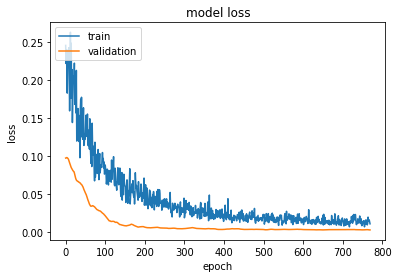

In [ ]:
print(history.history.keys())
# "Loss"
start=30
plt.plot(history.history['loss'][start:])
plt.plot(history.history['val_loss'][start:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predict and get metrics
from sklearn import metrics
y_pred= model_for_y1.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0504897619021817
Mean Squared Error: 0.004616212765829575
Root Mean Squared Error: 0.06794271679753154


In [ ]:
formatted_output = np.append(scaler_y1.inverse_transform(y_test), scaler_y1.inverse_transform(y_pred), axis = 1) 
col_names = ['Measured Ra', 'Measured Nw', 'Predicted Ra', 'Predicted Nw']
df = pd.DataFrame(formatted_output, columns=col_names, dtype='float') 
df[['Measured Ra', 'Predicted Ra', 'Measured Nw', 'Predicted Nw' ]]

,Measured Ra,Predicted Ra,Measured Nw,Predicted Nw
0,1.98,2.179785,0.186,0.199086
1,4.30,4.212256,0.383,0.351841
2,1.90,1.909178,0.184,0.188086
3,1.60,2.236563,0.221,0.216403
4,2.47,2.758849,0.276,0.284292
5,1.94,1.974556,0.127,0.151318
6,2.52,2.810912,0.186,0.202901
7,2.25,2.498773,0.235,0.216247
8,2.39,2.122429,0.180,0.175244
9,2.12,1.983119,0.160,0.164648


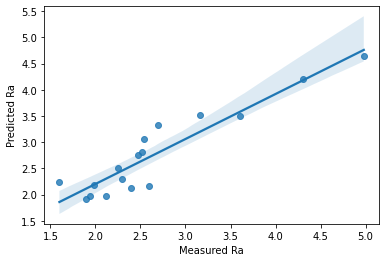

In [ ]:
sns.regplot(x="Measured Ra", y="Predicted Ra", data=df);

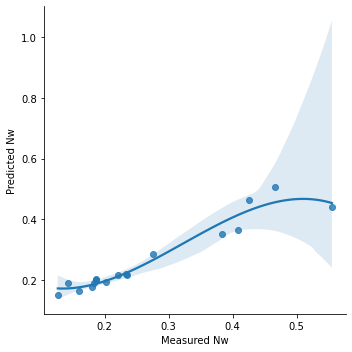

In [ ]:
sns.lmplot(x="Measured Nw", y="Predicted Nw", data=df, order=3);